In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lscf

In [2]:
%matplotlib tk

In [3]:
freq,H1_main = np.load("./data/acc_data.npy")

In [4]:
#udarec, pospeškomer
FRF = H1_main[:,1,:]

freq = freq
acc = lscf.lscf(FRF, freq, 10, 5000,1,60)
acc.poles()
acc.stab_chart(acc.poles,legend = False)

#or
#n_freq =  [176,476,932,1534,2258,3161,4180]
#acc.identification(n_freq)


Za izbiranje lastnih frekvenc uporabi SREDNJI gumb.
Za izbris zadnje točke uporabi DESNI gumb.


In [6]:
for i, (f, xi) in enumerate(zip(acc.nat_freq,acc.nat_ceta),start = 1):
    print("f%s = %4.1f Hz, xi = %4.5f" % (i,f,xi))

f1 = 176.0 Hz, xi = 0.00941
f2 = 476.4 Hz, xi = 0.00196
f3 = 932.0 Hz, xi = 0.00155
f4 = 1534.3 Hz, xi = 0.00195
f5 = 2285.6 Hz, xi = 0.00281
f6 = 3161.2 Hz, xi = 0.00217
f7 = 4180.6 Hz, xi = 0.00145


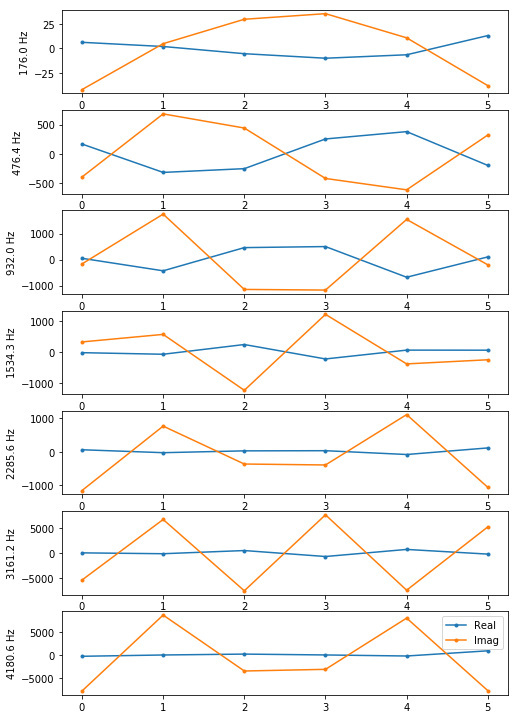

In [8]:
%matplotlib inline

const = []
for i in range(len(FRF)):
    acc.modal_const(frf_loc=i)
    const.append(acc.mk3)
    
const = np.asarray(const)[:, :len(acc.nat_freq)]
plt.figure(figsize = (8,len(acc.nat_freq)*1.8))

for i in range(len(acc.nat_freq)):
    plt.subplot(len(acc.nat_freq),1,i+1)
    plt.plot(np.real(const[:,i]),'.-',label = 'Real')
    plt.plot(np.imag(const[:,i]),'.-',label = 'Imag')
    plt.ylabel("%4.1f Hz" % acc.nat_freq[i]) 
    
plt.legend(loc = 'best');

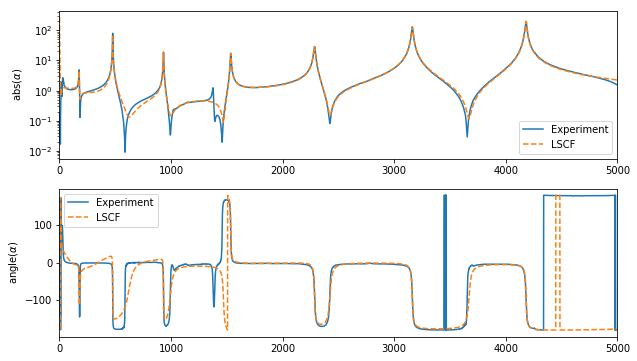

In [9]:
select_loc = 0

acc.modal_const(frf_loc=select_loc)
acc.reconstruct()

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(acc.freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(acc.rekf, np.abs(acc.rek),'--', label='LSCF')
plt.xlim(0,acc.rekf[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(acc.freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(acc.rekf, np.angle(acc.rek,deg = 1),'--',label='LSCF')
plt.xlim(0,acc.rekf[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best')